In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yoda_simulator as ys
%matplotlib inline

In [2]:
#get portfolio 1
iex_df = pd.read_pickle("./iex3years")
iex_df.drop(columns=['volume'], level=1, inplace=True)
iex_df.columns = iex_df.columns.droplevel(1)
iex_df.sort_index(ascending = True, inplace = True)

# Calculate the daily roi for the stocks
daily_return = iex_df.pct_change().dropna()

cal_avg = pd.DataFrame(daily_return.mean()).rename(columns = ({0:'avg'}))
cal_std = pd.DataFrame(daily_return.std()).rename(columns = ({0:'std'}))
portfolio1 = pd.concat((cal_avg, cal_std), axis = 1).T
portfolio1.loc['weight','SPY'] = 0.7
portfolio1.loc['weight','AGG'] = 0.3
portfolio1.loc[:,'XYZ'] =[0.000002,0.03,0]
portfolio1

,SPY,AGG,XYZ
avg,0.000507,0.000052,0.000002
std,0.008114,0.001879,0.030000
weight,0.700000,0.300000,0.000000


In [3]:
#get portfolio 2
portfolio2 = pd.DataFrame([[0.0002,0.000009,0.0002,0.00008],
                           [0.00003,0.0083,0.0005,0.000865],
                           [0.1,0.2,0.3,0.4]])
portfolio2

,0,1,2,3
0,0.00020,0.000009,0.0002,0.000080
1,0.00003,0.008300,0.0005,0.000865
2,0.10000,0.200000,0.3000,0.400000


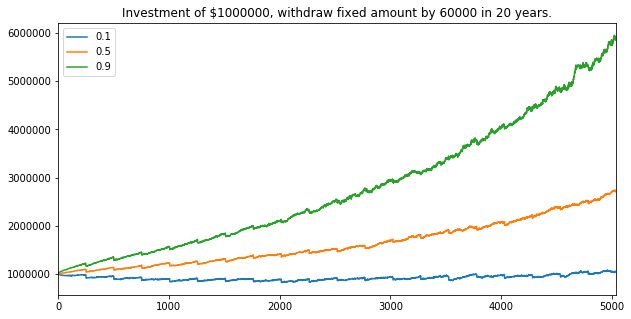

In [4]:
#ys.quantile_chart(portfolio, initial_investment,withdraw_type('fixed amount' or 'fixed rate', withdraw amount or withdraw rate, years to retirement)

ys.quantile_chart(portfolio1, 1_000_000,'fixed amount', 60_000,20)

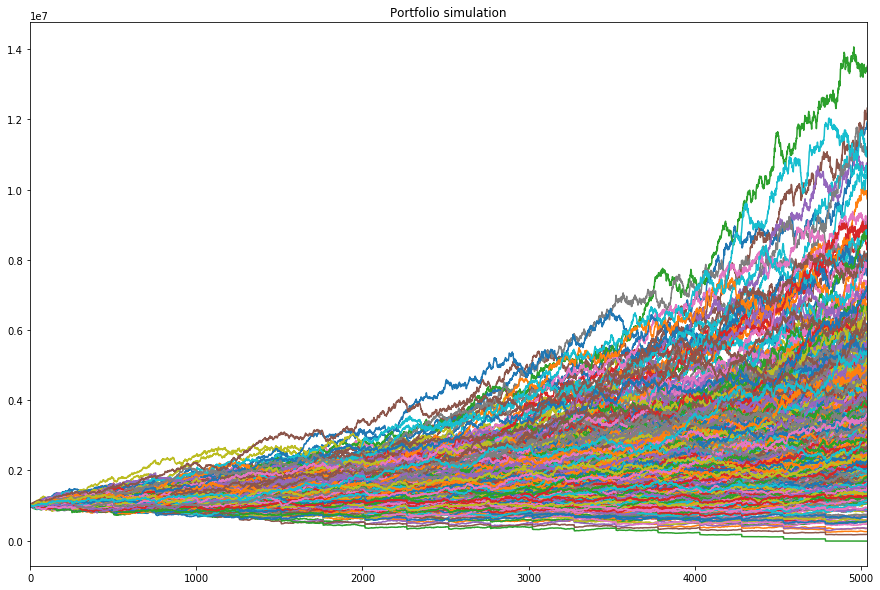

In [5]:
ys.simulation_chart(portfolio1, 1_000_000,'fixed amount', 60_000,20)

<module 'matplotlib.pyplot' from '/Users/junweiluo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

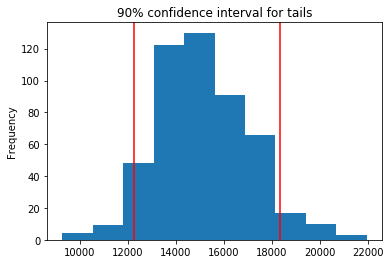

In [6]:
ys.confidence_interval(portfolio2, 10_000,'fixed amount', 100,20)

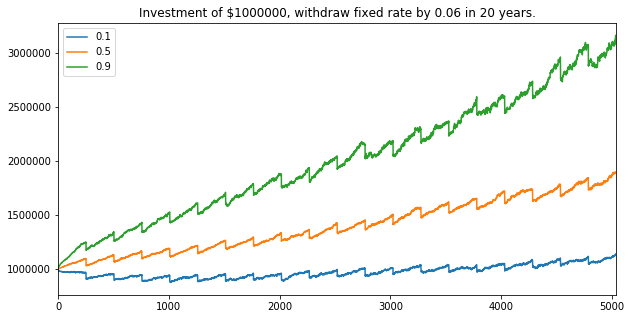

In [7]:
ys.quantile_chart(portfolio1, 1_000_000,'fixed rate', 0.06,20)

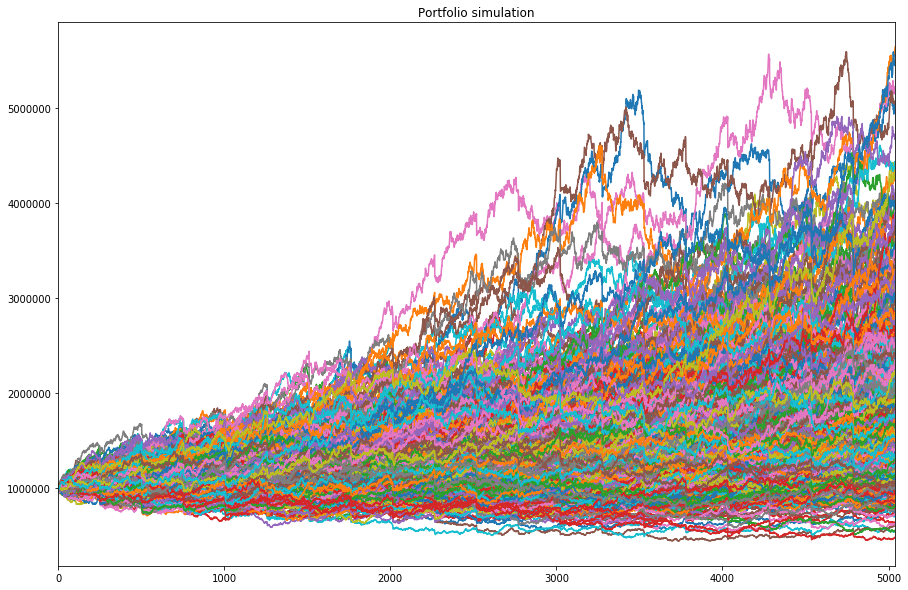

In [8]:
ys.simulation_chart(portfolio1, 1_000_000,'fixed rate', 0.06,20)

<module 'matplotlib.pyplot' from '/Users/junweiluo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

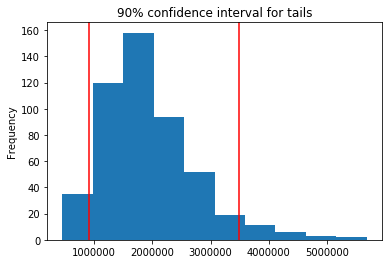

In [9]:
ys.confidence_interval(portfolio1, 1_000_000,'fixed rate', 0.06,20)

In [10]:
#ys.search_withdraw_amount(portfolio,initial_investment,years_to_retirement,target_return)

ys.search_withdraw_amount(portfolio2,10000,30,15000)

Your target return is out of bound.  Please input reasonable numbers!


In [11]:
ys.search_withdraw_amount(portfolio2,10000,20,25000)

Your target return is out of bound.  Please input reasonable numbers!


In [14]:
ys.search_withdraw_rate(portfolio1,10000,20,20000)

The desired withdraw rate is 2.5% annually, and ending 10% percentile balance after 20 years would be $22209.


In [15]:
ys.search_withdraw_rate(portfolio1,10000,20,200000)

Your target return is out of bound.  Please input reasonable numbers!
